# VARIMA MODEL

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('MY3_May_2023_KNN_Imputed.csv')
data

,Datetime,id,field1,field2,field3,field4,field5,field6,field7,field8
0,2022-07-03 20:30:00,2.200000e+01,8.871990,0.000000,398.496241,3.636364,26.00000,71.000000,45.666667,55.000000
1,2022-07-03 20:45:00,6.700000e+01,3.802281,0.000000,229.323308,0.000000,25.00000,62.000000,44.666667,53.333333
2,2022-07-03 21:00:00,1.120000e+02,12.674271,0.000000,184.210526,0.000000,25.00000,60.000000,43.666667,52.750000
3,2022-07-03 21:15:00,1.560000e+02,16.476553,0.000000,165.413534,0.000000,24.00000,59.666667,43.333333,52.666667
4,2022-07-03 21:30:00,5.307278e+05,321.540266,190.816359,794.429588,371.997558,27.25921,61.186420,18.749892,20.904609
...,...,...,...,...,...,...,...,...,...,...
28042,2023-04-21 23:00:00,1.061851e+06,397.944200,225.108225,700.960219,489.898990,29.00000,69.000000,27.666667,29.000000
28043,2023-04-21 23:15:00,1.061896e+06,392.070485,225.974026,707.818930,492.424242,29.00000,69.000000,31.666667,36.000000
28044,2023-04-21 23:30:00,1.061941e+06,393.538913,225.974026,716.049383,493.686869,29.00000,70.000000,33.333333,39.333333
28045,2023-04-21 23:45:00,1.061986e+06,392.070485,225.108225,727.023320,488.636364,29.00000,70.000000,35.333333,42.666667


In [8]:
from darts import TimeSeries
from darts.models import VARIMA
from darts.metrics import rmse, mae

# Extract the relevant columns
columns = ['Datetime', 'field1', 'field2', 'field3', 'field4', 'field5', 'field6', 'field7', 'field8']
subset_data = data[columns]

# Convert to multivariate time series
time_series = TimeSeries.from_dataframe(subset_data, 'Datetime', columns[1:])
train_data = time_series[:-1000]
val_data = time_series[-1000:]

# Fit VARIMA model
model = VARIMA(p=1, d=0, q=0)  # Modify the parameters as needed
model.fit(train_data)

# Make predictions
predictions = model.predict(len(val_data))

# Calculate error metrics
rmse_val = rmse(val_data, predictions)
mae_val = mae(val_data, predictions)

# Create DataFrame to store error values
error_df = pd.DataFrame({'Model': ['VARIMA'], 'RMSE': [rmse_val], 'MAE': [mae_val]})

# Create CSV file and save error DataFrame
error_df.to_csv('VARIMA_metrics.csv', index=False)


C:\Users\musta\anaconda3\envs\mustak\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


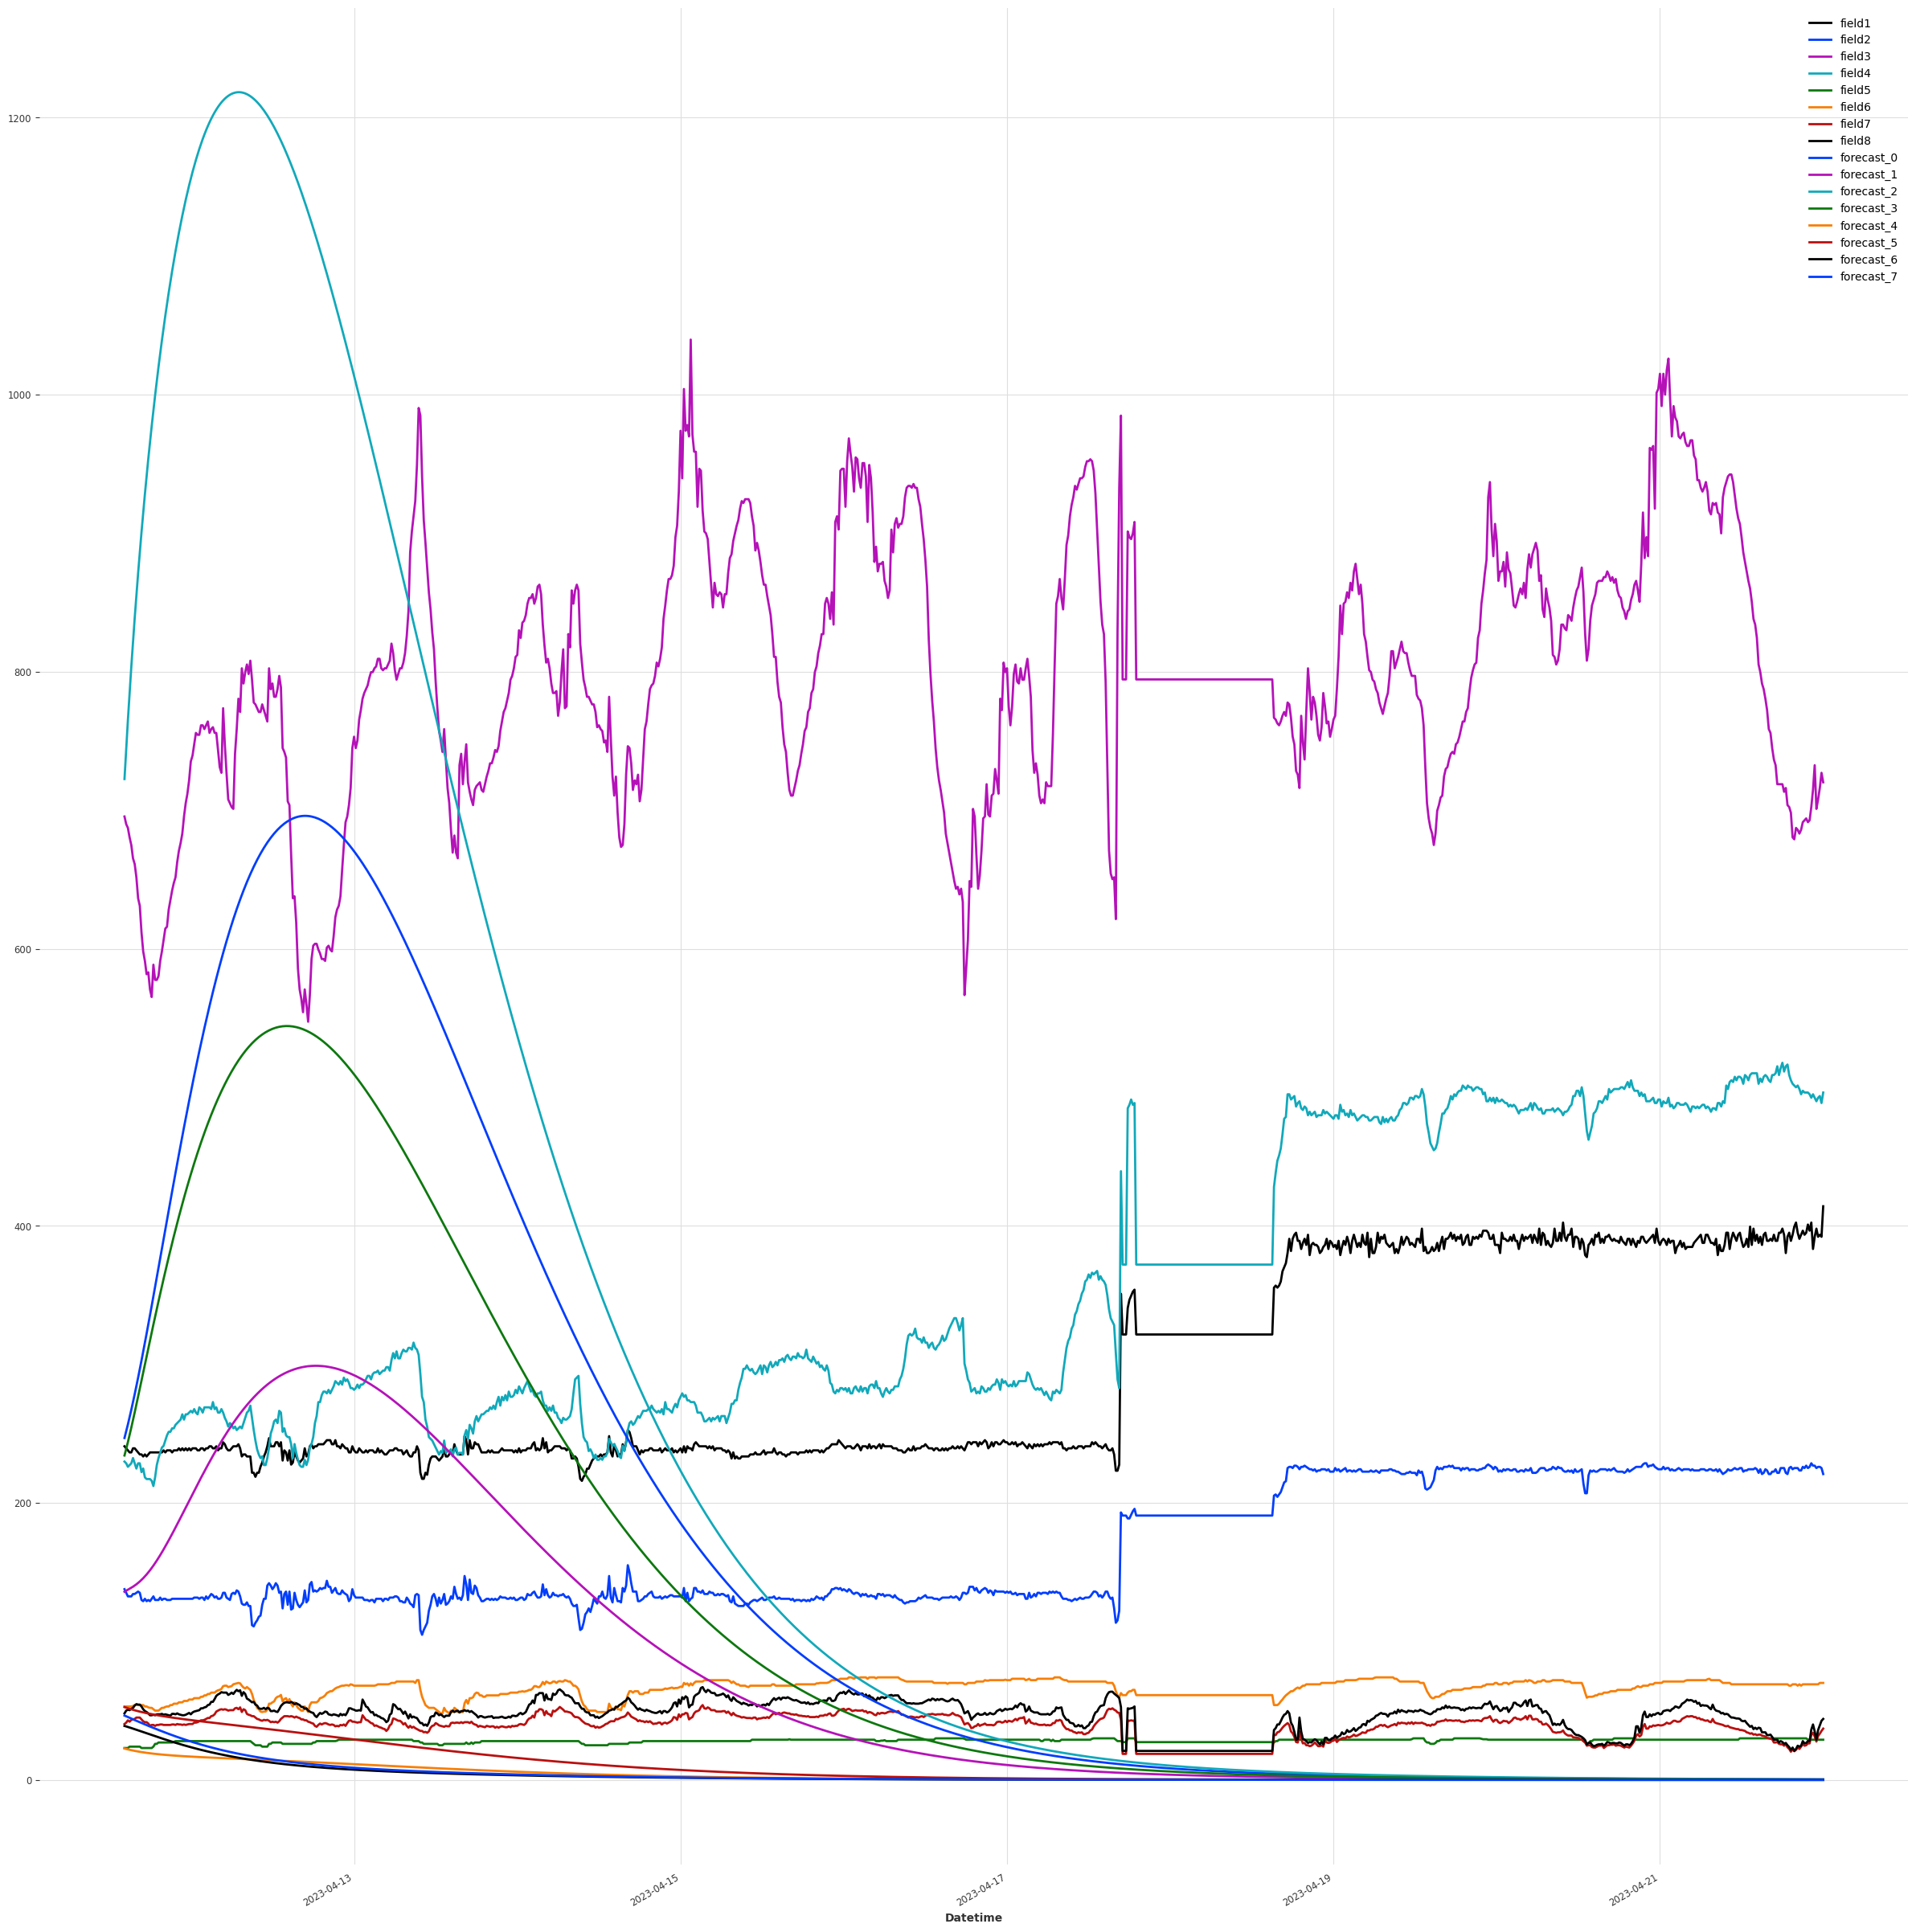

In [9]:
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

#mean_absolute_error(val,pred)
plt.rcParams['figure.figsize'] = [30, 30]
val_data.plot()
predictions.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()